This explores the visualization of a CCF computed with different lag times.
This visualization should give a sense of how well a timeseires might be used to predict another.
A consistently high CCF magnitude at high lag is ideal.
This viz also reveals how the correlation between series might shift over time.
Ie one series may be a good predictor for only a short time.
This information may still be useful; eg if a changes in series utility changes slowly or predictably.

In [1]:
"""params"""
# TIME_SERIES_1 = "../../../test_data/generated/timeseries_binary_signal.csv"
# TIME_SERIES_2 = "../../../test_data/generated/timeseries_binary_signal_noisy.csv"
TIME_SERIES_1 = "../../../test_data/generated/sine_1.csv"
TIME_SERIES_2 = "../../../test_data/generated/sine_2.csv"

In [2]:
from plo7y.get_test_data import get_test_data
sig = get_test_data(TIME_SERIES_1)
sig_2 = get_test_data(TIME_SERIES_2)

ndims: 1, 2
ndims: 1, 2
ndims: 1, 2
ndims: 1, 2
ndims: 1, 2
ndims: 1, 2
ndims: 1, 2
ndims: 1, 2
ndims: 1, 2
ndims: 1, 2


/usr/local/lib/python3.5/dist-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


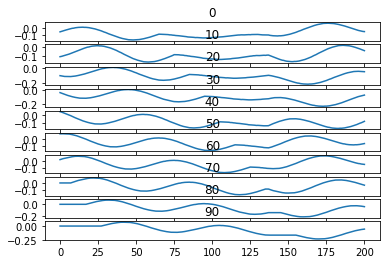

In [16]:
"""Plot w/ subplots"""
from plo7y.plotters.ccf_scipy import prep_dataframes
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

sig_len = 128

n_plots = 10
step_n = 10
fig, axes = plt.subplots(n_plots, 1, sharex=True)

for lag in range(0, n_plots*step_n, step_n):
    sig_2b = sig_2.shift(lag)
    sig, sig_2b = prep_dataframes(sig, sig_2b)
    sig_2b = np.nan_to_num(sig_2b)
    corr = signal.correlate(sig_2b, np.ones(sig_len), mode='same') / sig_len
#     print(corr)

    axes[int(lag/step_n)].set_title(lag)
    axes[int(lag/step_n)].plot(corr)

fig.tight_layout()



ndims: 1, 2
ndims: 1, 2
ndims: 1, 2
ndims: 1, 2
ndims: 1, 2
ndims: 1, 2
ndims: 1, 2
ndims: 1, 2
ndims: 1, 2
ndims: 1, 2


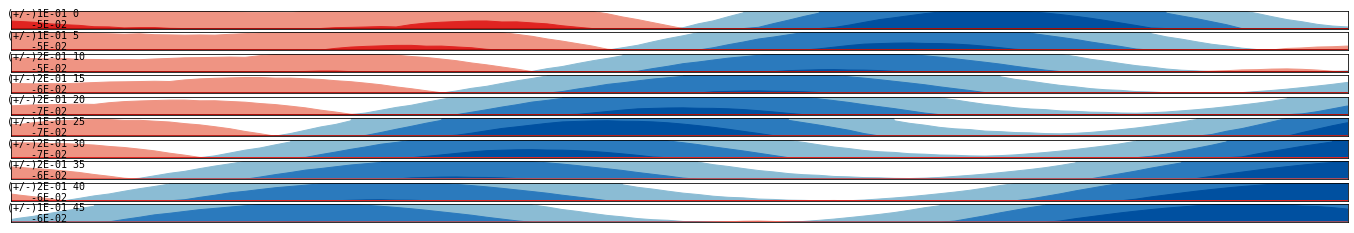

In [31]:
"""Plot w/ horizonplot"""
from plo7y.plotters.ccf_scipy import prep_dataframes
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
import pandas as pd

sig_len = 128

n_plots = 10
step_n = 5

x_0 = min(sig)
x_f = max(sig)
dx = len(sig)
df = pd.DataFrame({"x": np.linspace(x_0, x_f, dx)})

lags = []
for lag in range(0, n_plots*step_n, step_n):
    sig_2b = sig_2.shift(lag)
    sig, sig_2b = prep_dataframes(sig, sig_2b)
    sig_2b = np.nan_to_num(sig_2b)
    corr = signal.correlate(sig_2b, np.ones(sig_len), mode='same') / sig_len
#     print(corr)
    df[str(lag)] = corr 
    lags.append(str(lag))

    
from plo7y.plotters.ts_many_horizongraph import plot
plot(
    df, 'x', lags,
)

